Tean Lai (tml95)

In [51]:
# Setup
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable

Signal = Callable[[int], float]

def delta(n: int) -> float:
    if n == 0:
        return 1.
    else:
        return 0.

def u(n: int) -> float:
    if n >= 0:
        return 1.
    else:
        return 0.

def dt_convolve(
        x1: Signal, 
        x2: Signal, 
        n1: int, n2: int) -> Signal:
    """
    [n1, n2) is the support interval of x1
    """
    x1, x2 = np.vectorize(x1), np.vectorize(x2)
    def x(n: int) -> float:
        sum_times = np.array(range(n1, n2))
        return sum(x1(sum_times) * x2(n - sum_times))
    return x

def sup_add(s1, s2):
    """
    Adds support intervals together
    """
    k1, k2 = s1[0], s2[0]
    P = s1[1] - k1
    L = s2[1] - k2
    N = P + L - 1
    return (k1 + k2, k1 + k2 + N)


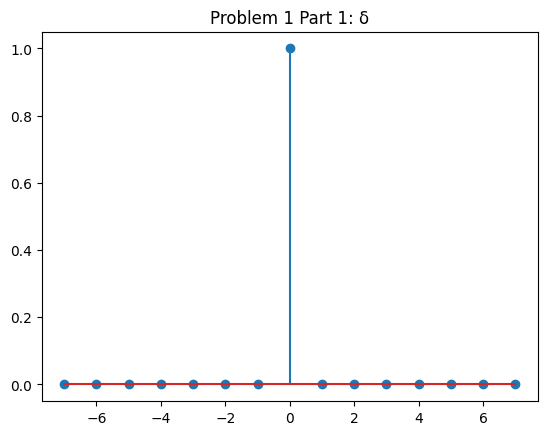

In [52]:
# Problem 1 Part 1
time = np.array(range(-7, 8))
plt.stem(time, np.vectorize(delta)(time))
plt.title("Problem 1 Part 1: δ")
plt.show()

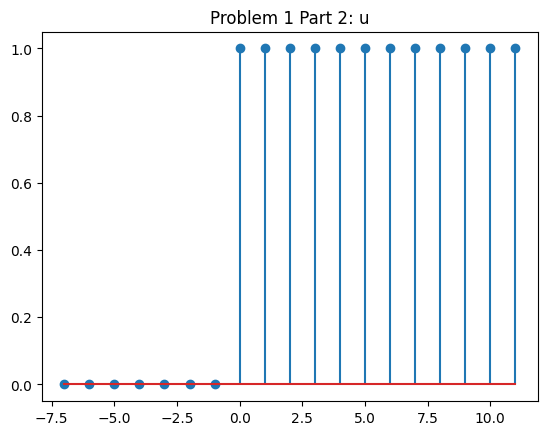

In [53]:
# Problem 1 Part 2
time = np.array(range(-7, 12))
plt.stem(time, np.vectorize(u)(time))
plt.title("Problem 1 Part 2: u")
plt.show()

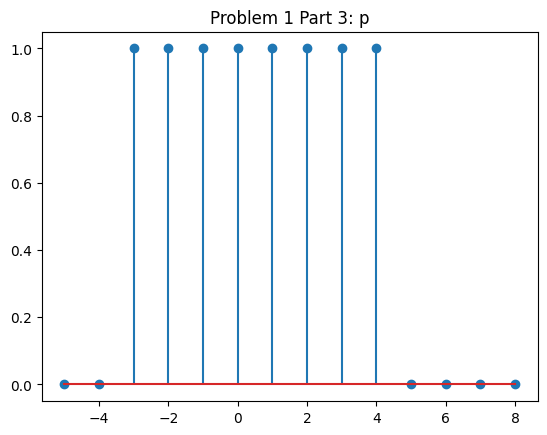

In [54]:
# Problem 1 Part 3
def p(n):
    if -3 <= n < 5:
        return 1
    else:
        return 0
time = np.array(range(-5, 9))
plt.stem(time, np.vectorize(p)(time))
plt.title("Problem 1 Part 3: p")
plt.show()

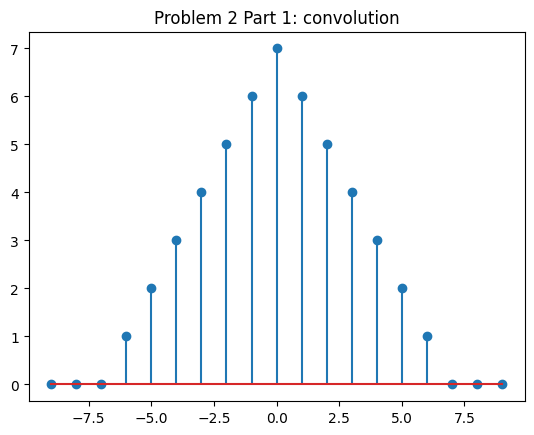

In [55]:
# Problem 2 Part 1
def pulse(n):
    if -3 <= n < 4:
        return 1
    else:
        return 0

convolve = dt_convolve(pulse, pulse, -3, 4)
convolve = np.vectorize(convolve)

time = np.array(range(-9, 10))
plt.stem(time, convolve(time))
plt.title("Problem 2 Part 1: convolution")
plt.show()


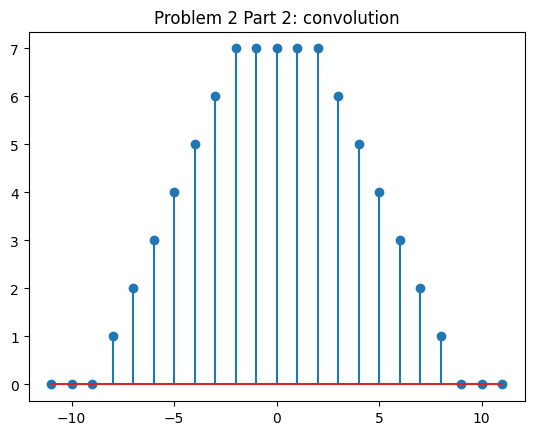

In [56]:
# Problem 2 Part 2
def pulse1(n):
    if -3 <= n < 4:
        return 1.
    else:
        return 0.
def pulse2(n):
    if -5 <= n < 6:
        return 1.
    else:
        return 0.

convolution = dt_convolve(pulse1, pulse2, -3, 4)
time = np.array(range(-11, 12))
plt.stem(time, np.vectorize(convolution)(time))
plt.title("Problem 2 Part 2: convolution")
plt.show()


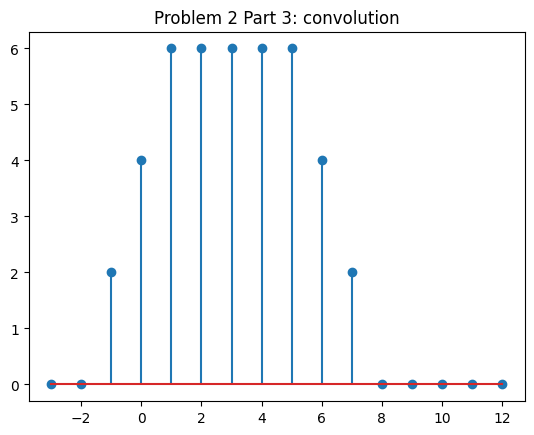

In [57]:
# Problem 2 Part 3
def pulse1(n):
    if -3 <= n < 4:
        return 1.
    else:
        return 0.

def pulse2(n):
    if 2 <= n < 5:
        return 2.
    else:
        return 0.

convolution = dt_convolve(pulse1, pulse2, -3, 4)
time = np.array(range(-3, 13))
plt.stem(time, np.vectorize(convolution)(time))
plt.title("Problem 2 Part 3: convolution")
plt.show()

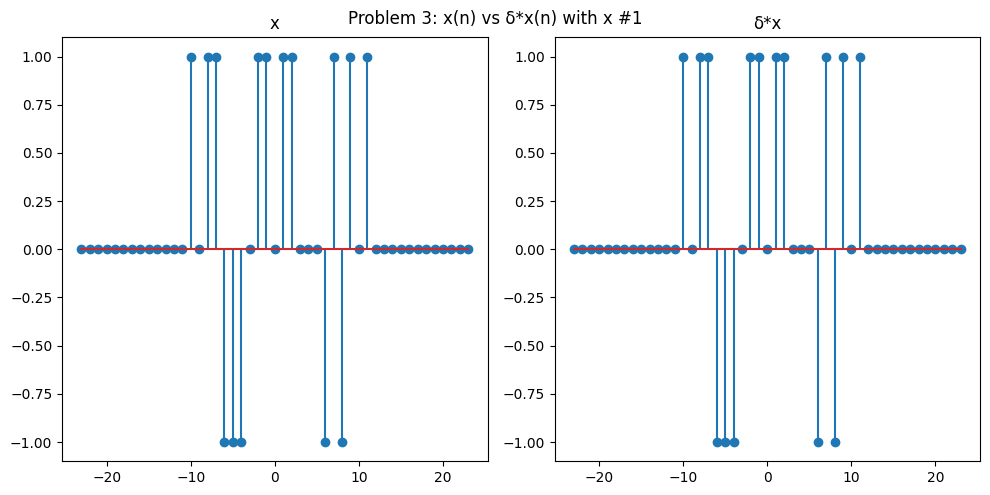

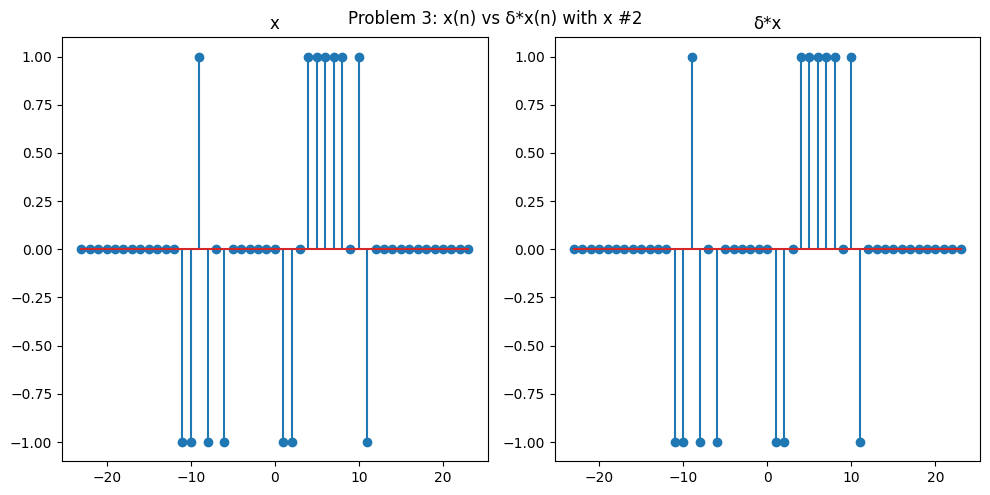

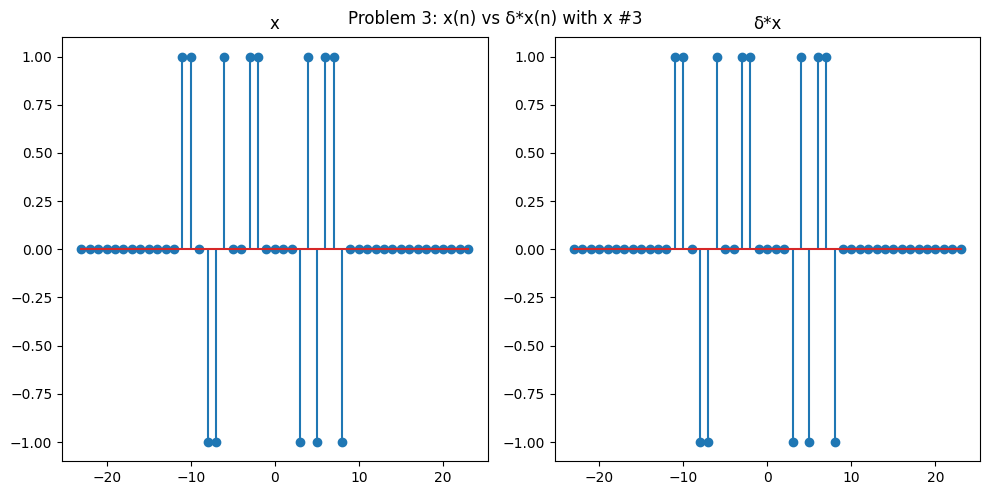

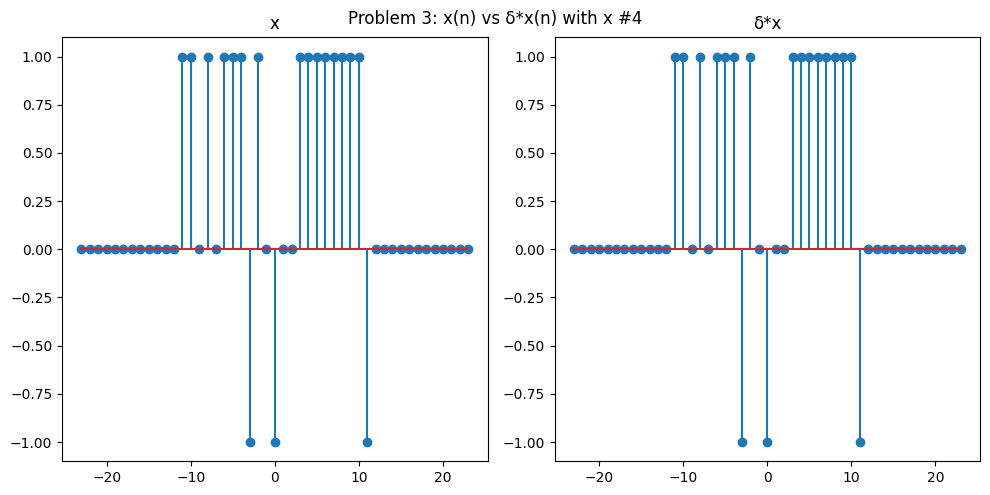

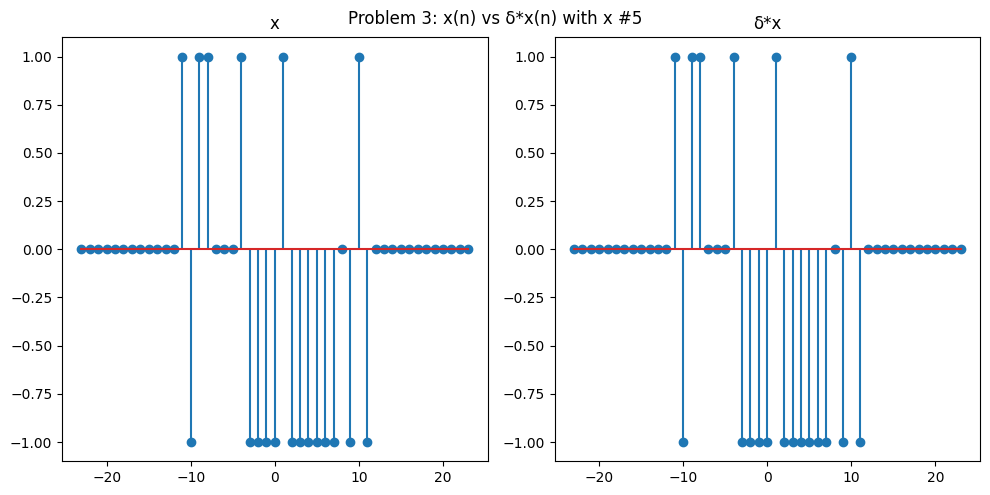

In [58]:
# Problem 3, 5 graphs to show randomized x, also shows that delta * x is the same.
def gen_signal():
    random_vals = np.random.randint(-1, 2, 23)
    def x(n: int) -> float:
        if abs(n) > 11:
            return 0.
        else:
            return float(random_vals[n + 11])
    return x

for i in range(5):
    x = gen_signal()
    convolution = dt_convolve(delta, x, 0, 1)

    x, convolution = np.vectorize(x), np.vectorize(convolution)

    times = np.array(range(-23, 24))

    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.stem(times, x(times))
    ax1.set_title("x")

    ax2.stem(times, convolution(times))
    ax2.set_title("δ*x")

    # Display the plots side by side
    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.suptitle("Problem 3: x(n) vs δ*x(n) with x #%d"%(i + 1))
    plt.show()

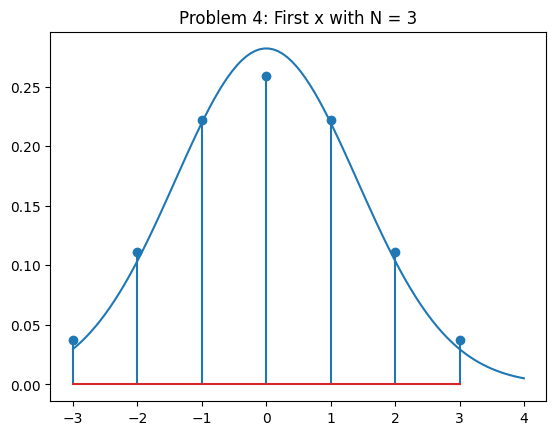

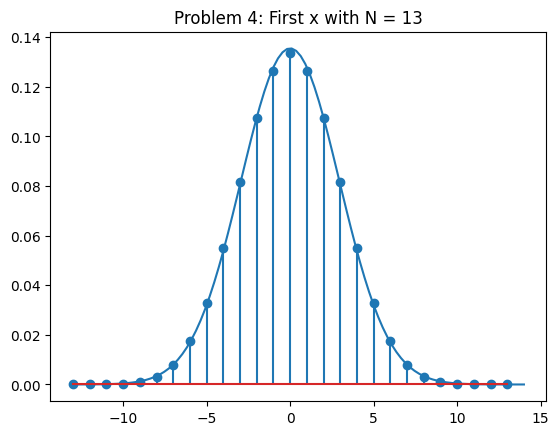

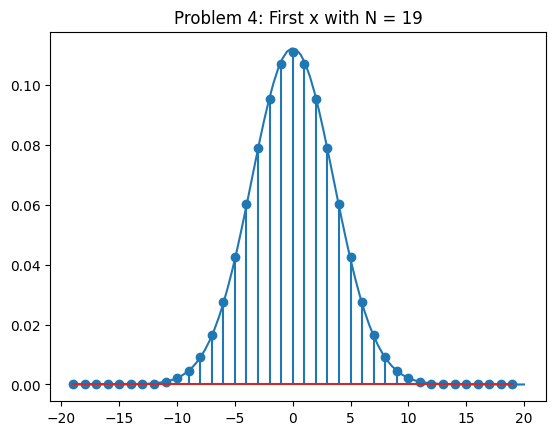

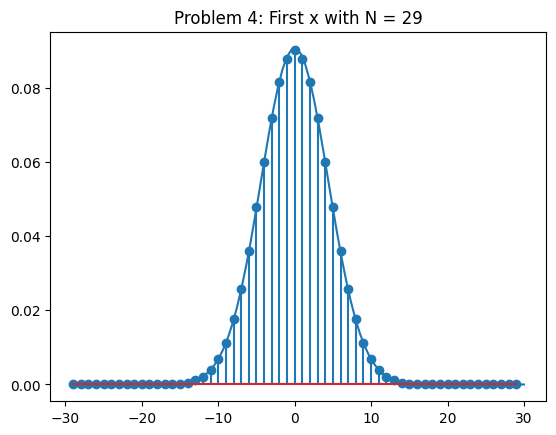

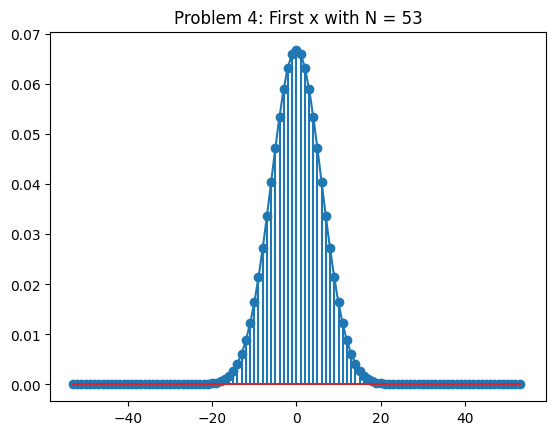

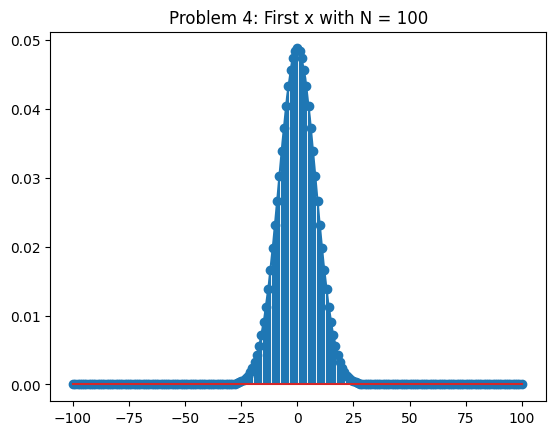

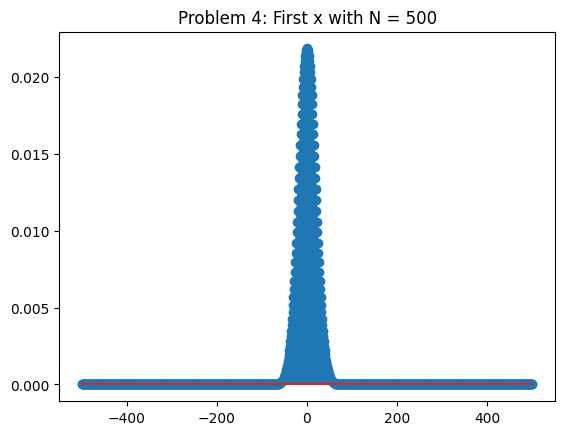

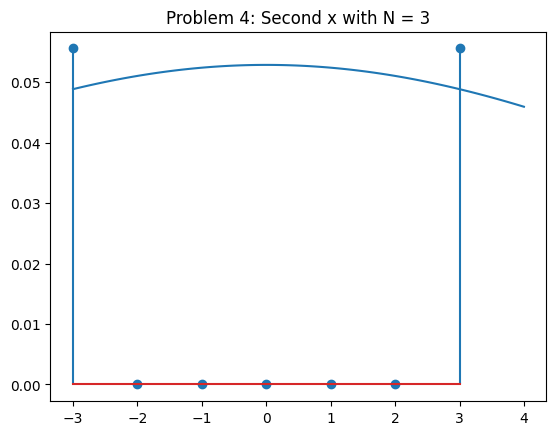

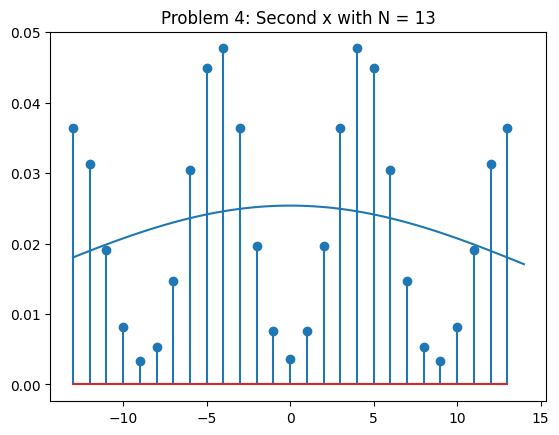

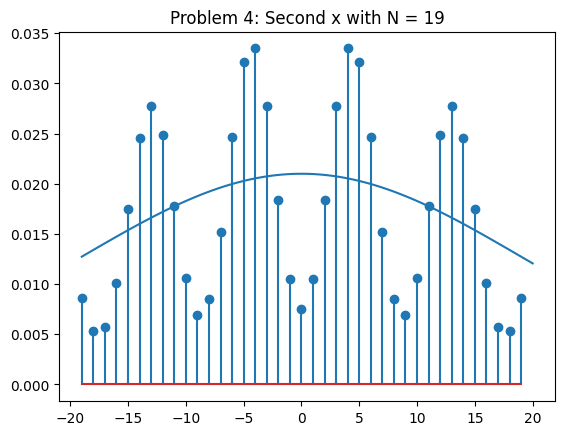

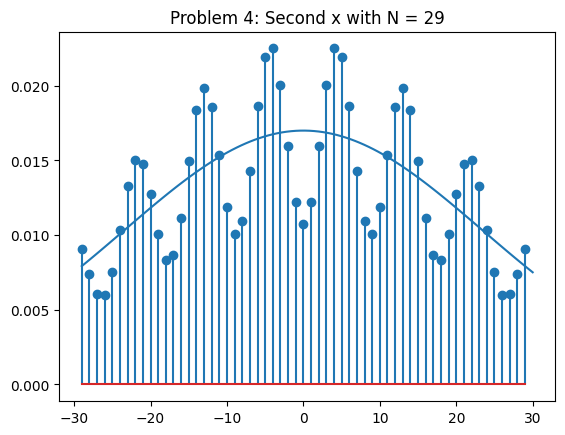

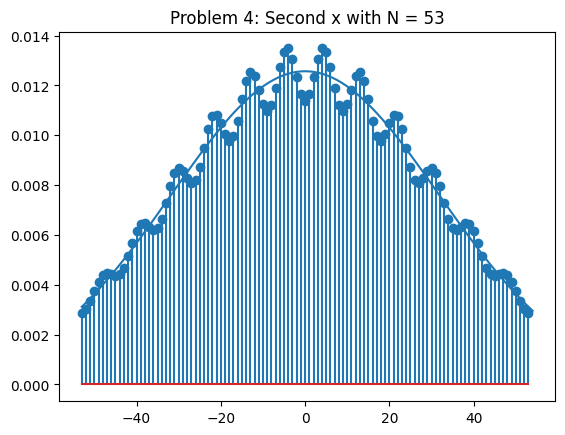

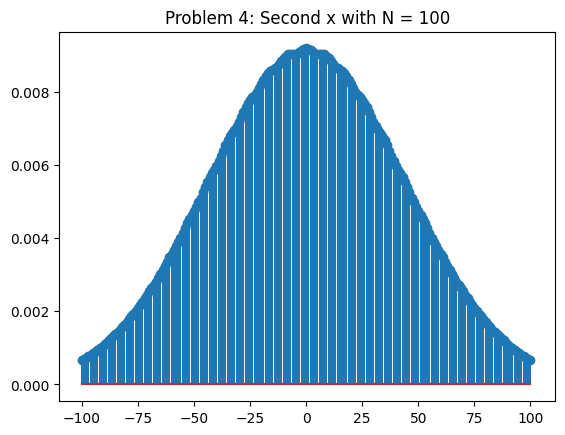

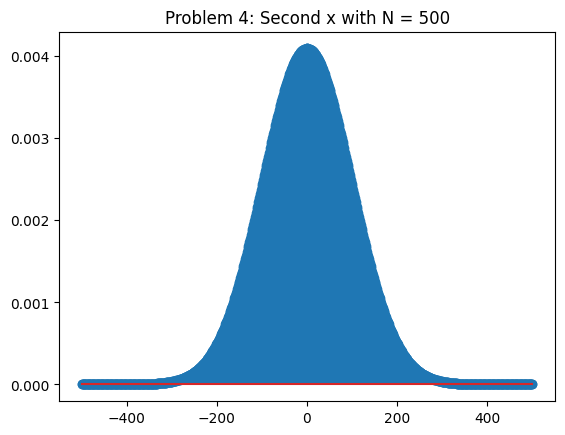

In [59]:
def gen_y_n(x, x_sup, n):
    conv = np.convolve(x, x)
    conv_sup = sup_add(x_sup, x_sup)
    for i in range(2, n):
        conv = np.convolve(conv, x)
        conv_sup = sup_add(conv_sup, x_sup)

    def y(n: int) -> float:
        if conv_sup[0] <= n < conv_sup[1]:
            return conv[n - conv_sup[0]]
        else:
            return 0.
        
    return y, conv_sup

def gen_sigma_n(y_n, y_sup):
    sigma_n = 0
    for n in range(y_sup[0], y_sup[1]):
        sigma_n += (n ** 2) * y_n(n)
    sigma_n = np.sqrt(sigma_n)
    return sigma_n

def gen_gaussian(sigma_n):
    def gaussian(n):
        return (1 / np.sqrt(2 * np.pi * sigma_n**2) * np.exp(-n**2 / (2 * sigma_n **2)))
    return gaussian


x1_array = np.array([1/3] * 3)
x1_sup = (-1, 2)
x2_array = np.array([1/6, 1/3] + ([0] * 7) + [1/3, 1/6])
x2_sup = (-5, 6)
for x_array, x_sup in [(x1_array, x1_sup), (x2_array, x2_sup)]:
    for n in [3, 13, 19, 29, 53, 100, 500]:
        y_n, y_sup = gen_y_n(x_array, x_sup, n)
        sigma_n = gen_sigma_n(y_n, y_sup)
        gaussian = gen_gaussian(sigma_n)

        times = np.linspace(-n, n + 1, 100)
        plt.plot(times, np.vectorize(gaussian)(times))

        times = np.array(range(-n, n + 1))
        plt.stem(times, np.vectorize(y_n)(times))

        if x_sup == x1_sup:
            tmp = "First"
        else:
            tmp = "Second"
        plt.title("Problem 4: %s x with N = %d"%(tmp, n))
        plt.show()